In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import math
from math import pi
np.set_printoptions(
    linewidth=120, formatter={
        'float': lambda x: f"{0:8.4g}" if abs(x) < 1e-10 else f"{x:8.4g}"})
np.random.seed(0)
from spatialmath import *
from spatialmath.base import *
from roboticstoolbox import *

FORWARD KINEMATICS FROM A POSE GRAPH

Representamos mediante una secuencia de transformaciones elementales (ETS)


Brazo robotico con 1 articulacion y un eslabon q0

Pose de un efector final que tiene un eslabon y una angulo de rotacion. Se compone de la pose relativa de rotacion y una pose relativa de traslacion in el la direccion x

In [2]:
a1 = 1
e = ET2.R() * ET2.tx(a1)
e

R(q) ⊕ tx(1)


Numero de transformaciones: 1 variable, 1 constante

In [3]:
len(e)

2

pose relativa  resultado de componer dos movimientos elementales.
En este caso q es una articulacion (joint) variable


In [4]:
print(e)

R(q) ⊕ tx(1)


Evaluacion de la cinematica directa. El resultado da la pose del efector final cuando se da un valor de la articulacion de q=pi/6

In [5]:
e.fkine(pi / 6)

   0.866    -0.5       0.866     
   0.5       0.866     0.5       
   0         0         1         


Equivalencia con SE2 (grupo euclidiano especial en 2d), este objeto representa una transformacion rigida en 2d

In [10]:
SE2.Rot(pi / 6) * SE2.Tx(a1)

   0.866    -0.5       0.866     
   0.5       0.866     0.5       
   0         0         1         


Brazo robotico con 2  articulaciones q0 y q1

La pose del efector final


In [9]:
a0 = 1; a1 = 1
e = ET2.R() * ET2.tx(a0) * ET2.R() * ET2.tx(a1)
e

R(q0) ⊕ tx(1) ⊕ R(q1) ⊕ tx(1)


Evaluacion de la pose del efector final para angulos especificos de las articulaciones en grados


In [17]:
e.fkine(np.deg2rad([30, 40])).printline()

t = 1.21, 1.44; 70°


Equivalencia utilizando el objeto SE2

In [18]:
T = SE2.Rot(np.deg2rad(30)) * SE2.Tx(a0) * SE2.Rot(np.deg2rad(40)) * SE2.Tx(a1)
T.printline()

t = 1.21, 1.44; 70°


Numero de articulaciones (joints) segun el objeto ETS2

In [19]:
e.n

2

Transformaciones elementales en la secuencia de las articulaciones

In [20]:
e.joints()

[R(q0), R(q1)]

Tipo de articulacion en la secuencia cinematica, en este caso dos articulaciones del tipo rotacional ambas

In [88]:
e.structure

'RR'

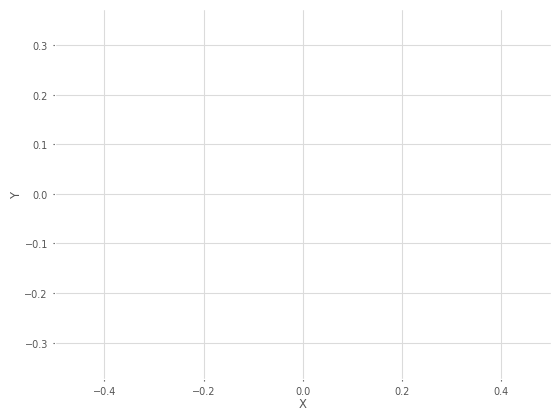

<Figure size 640x480 with 0 Axes>

In [23]:
e.plot(np.deg2rad([30, 40]))
plt.show()

El objeto ETS2 puede entrega una lista de sus componentes

In [31]:
e[3]



tx(1)

Metodos de un objeto ET2

Retorna la constante de la transformacion, en este caso a0

In [44]:
e[0].eta

Matriz SE2, que representa la traslacion de 1 en la direccion x

In [46]:
e[1].A()

array([[       1,        0,        1],
       [       0,        1,        0],
       [       0,        0,        1]])